# Tablas de frecuencia y diagrmas de Pareto

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.ticker import PercentFormatter


In [3]:
Productos=pd.read_csv ('C:/Users/pc/Archivos en Jupyter/Tablas de Frecuencias y Diagrama de Pareto en Python/Datos Compras.csv', engine ='python')
Productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Transaccion  42 non-null     int64 
 1   Producto     42 non-null     object
dtypes: int64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
Productos.head()

,Transaccion,Producto
0,1,Leche
1,1,Huevos
2,1,Pan
3,1,Mantequilla
4,2,Salchichas


In [9]:
frec = pd.value_counts(Productos["Producto"])

In [10]:
frec

Leche          9
Pan            9
Mantequilla    9
Galletas       5
Catsup         3
Huevos         2
Salchichas     2
Harina         1
Mermerlada     1
Atun           1
Name: Producto, dtype: int64

In [11]:
frec_df=pd.DataFrame(frec)
frec_df

,Producto
Leche,9
Pan,9
Mantequilla,9
Galletas,5
Catsup,3
Huevos,2
Salchichas,2
Harina,1
Mermerlada,1
Atun,1


In [13]:
frec_df.columns = ["Frec_abs"]

In [14]:
frec_df

,Frec_abs
Leche,9
Pan,9
Mantequilla,9
Galletas,5
Catsup,3
Huevos,2
Salchichas,2
Harina,1
Mermerlada,1
Atun,1


In [15]:
frec_df["Frec_rel_%"]= 100*frec_df["Frec_abs"]/len(Productos)

In [16]:
frec_df

,Frec_abs,Frec_rel_%
Leche,9,21.428571
Pan,9,21.428571
Mantequilla,9,21.428571
Galletas,5,11.904762
Catsup,3,7.142857
Huevos,2,4.761905
Salchichas,2,4.761905
Harina,1,2.380952
Mermerlada,1,2.380952
Atun,1,2.380952


In [18]:
Prec_rel_val= frec_df["Frec_rel_%"].values


In [19]:
acum =[]

In [20]:
valor_acum=0

In [22]:
for i in Prec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)

In [23]:
frec_df["Frec_rel_%_acum"]=acum

In [24]:
frec_df

,Frec_abs,Frec_rel_%,Frec_rel_%_acum
Leche,9,21.428571,21.428571
Pan,9,21.428571,42.857143
Mantequilla,9,21.428571,64.285714
Galletas,5,11.904762,76.190476
Catsup,3,7.142857,83.333333
Huevos,2,4.761905,88.095238
Salchichas,2,4.761905,92.857143
Harina,1,2.380952,95.238095
Mermerlada,1,2.380952,97.619048
Atun,1,2.380952,100.000000


C:\Users\pc\AppData\Local\Temp/ipykernel_10508/4137752772.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(frec_df.index, rotation=75)


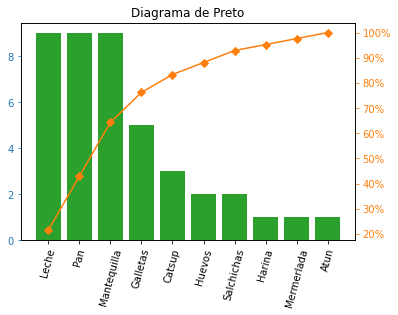

In [41]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_title('Diagrama de Preto')
ax.bar(frec_df.index, frec_df["Frec_abs"], color="C02")
ax2=ax.twinx()
ax2.plot(frec_df.index, frec_df["Frec_rel_%_acum"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
ax.set_xticklabels(frec_df.index, rotation=75)
plt.show()